In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-extended/train.csv
/kaggle/input/titanic-extended/full.csv
/kaggle/input/titanic-extended/test.csv


# What is an Outlier?
In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.<br> 
Source: Wikipedia


### Note:
Their is no specific fuction or method of finding an outlier as it is a datapoint, it can only be detected via observations.

In [2]:
df=pd.read_csv("../input/titanic-extended/full.csv",usecols=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age','Fare','SibSp'])

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500
...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,8.0500
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,108.9000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,7.2500
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Fare         1308 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 81.9+ KB


# Corrupting the dataset to learn more

Note: New learners please skip this step learn about outliers therefore, we'll learn how I planted those outliers.

In [5]:
#replacing male with 1 and female with 0 
#by doing this the series willl be converted to a integer datatype
df["Sex"].replace(to_replace="male",value=1,inplace=True)

In [6]:
df["Sex"].replace(to_replace="female",value=0,inplace=True)

In [7]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Fare             1
dtype: int64

In [8]:
#filling all the null values in series Age with 0
df["Age"].fillna(0,inplace=True)

In [9]:
df["Sex"].astype("int")

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [10]:
df.loc[1105,"Sex"]=7

In [11]:
df.loc[1305,"Age"]=315

# Let's study the Data for Outliers

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Fare         1308 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 81.9+ KB


# Decribing the data 
The outliers are mostly founds in numerical data. df.describe() clears the picture to some extent and helps in identifying the outliers

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,0.649351,24.088365,0.498854,33.295479
std,378.020061,0.486592,0.837836,0.509881,19.339437,1.041658,51.758668
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,7.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,1.000000,24.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,31.275000
max,1309.000000,1.000000,3.000000,7.000000,315.000000,8.000000,512.329200


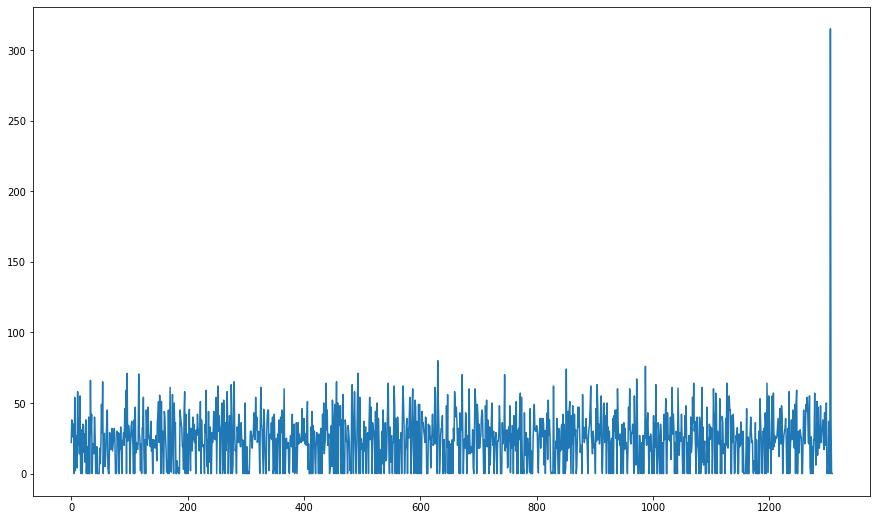

In [14]:
# plotting all the values 
# this will help in identifying the outlier in easy way
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
df.Age.plot()
plt.show()

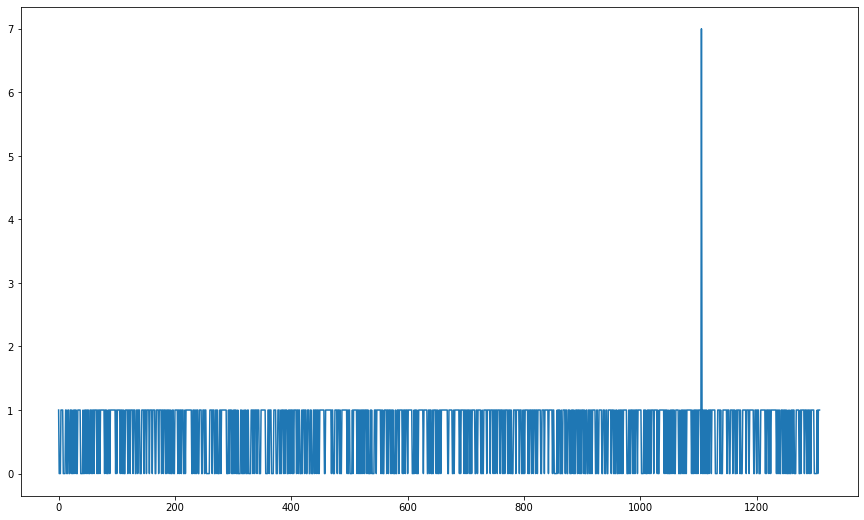

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
df.Sex.plot()
plt.show()

# Why these values are Outliers?
1. Age can not be around 350 (max value of age)
2. Sex can either be 1 or 0 can't be 7 (max value of Sex)

# Handling / Removing the Outliers

In [16]:
df["Age"]>90

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: Age, Length: 1309, dtype: bool

In [17]:
# printing the rows where the age value is greater than 90
df[df["Age"]>90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,315.0,0,108.9


In [18]:
# printing the rows where the value in sex column is greater than 1
df[df["Sex"]>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",7,38.0,4,7.775


In [19]:
#fetching the index value
df[df["Sex"]>1].index

Int64Index([1105], dtype='int64')

# Replacing the values using .loc()

In [20]:
df.loc[1105,"Sex"]=1

# Dropping the outlier value

In [21]:
df[df["Age"]>90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,315.0,0,108.9


In [22]:
df[df["Age"]>90].index

Int64Index([1305], dtype='int64')

In [23]:
df.drop(index=1305,inplace=True)

In [24]:
df[df["Age"]>90]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Fare


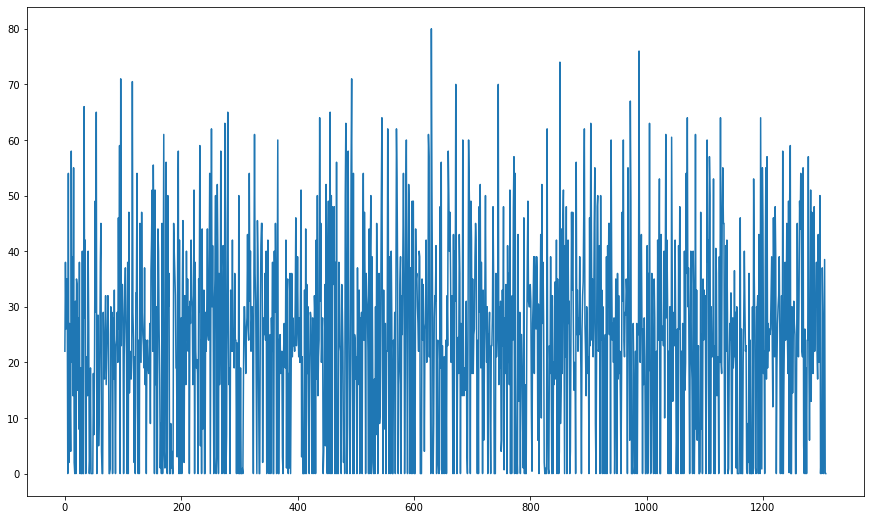

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
df.Age.plot()
plt.show()

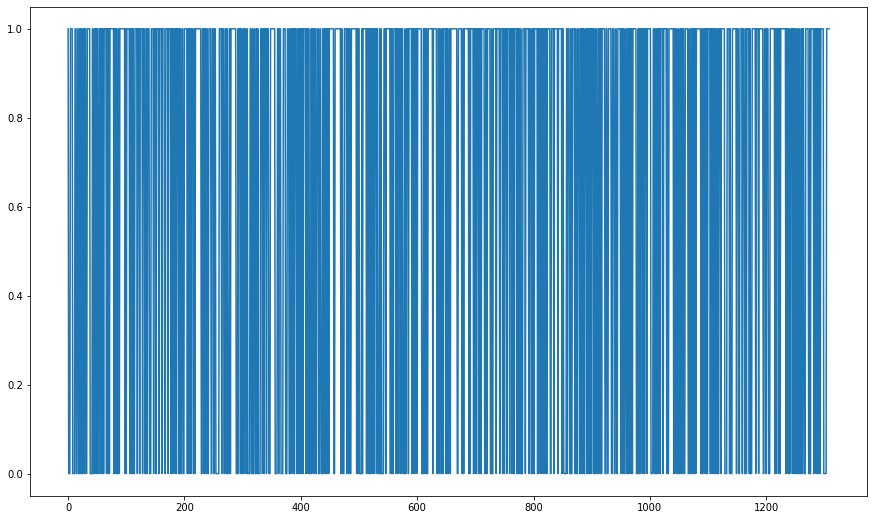

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
df.Sex.plot()
plt.show()

# Conclusion 
There are many ways to handle the outliers however it totally depends on the user how he wants to handle the outliers. Here, we have used two ways:
1. Replacing the Outlier using Index
2. Dropping the Outlier using Index